# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../traffic-signs-data/train.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
#print(X_train)
#print(y_train[1])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[1])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Shape of Train Set=",X_train.shape[0])
print("Shape of Train Label Set=",y_train.shape)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Shape of Train Set= 39209
Shape of Train Label Set= (39209,)
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

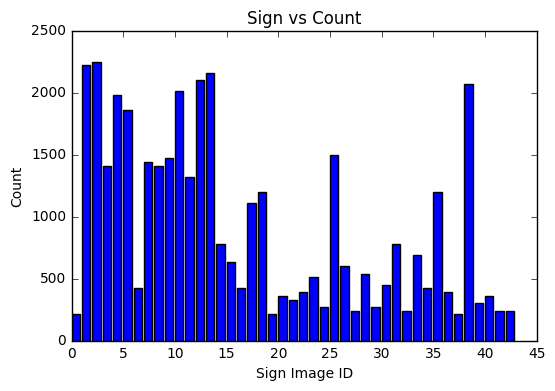

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

y_train_unique=np.unique(y_train,return_counts=True)
plt.bar(y_train_unique[0], y_train_unique[1])
plt.xlabel('Sign Image ID')
plt.ylabel('Count')
plt.title('Sign vs Count')
plt.show()


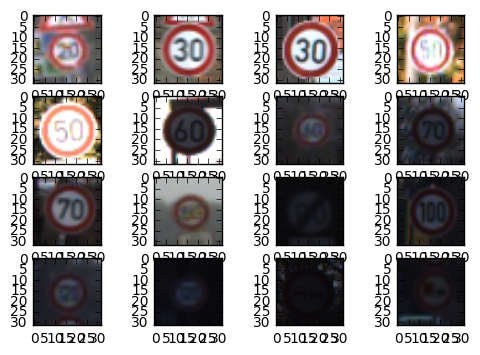

In [4]:
#display 16 images
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i*1000])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

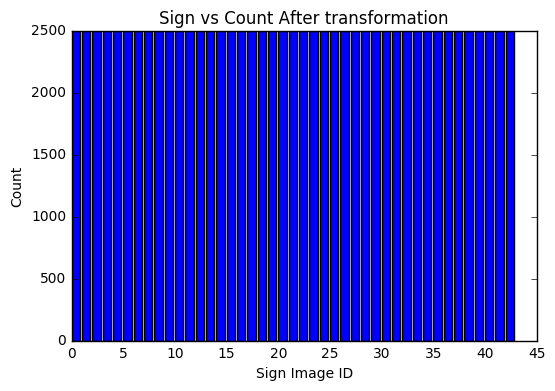

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#I will be transforming to YUV channel and use Y only as mentioned in the Confluence and Slack and the Paper above.
#I will experiment with other transformations once I get the working code
import scipy.ndimage
import cv2
train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

test_features = X_test
test_labels = y_test
#test_lables = np.array()

transformed_features = []
transformed_labels = []

#As the number of examples per label is different, to make everything equal, I will make 2500 images per each label.
label_counts = np.bincount(train_labels)
for i in range(len(label_counts)):
    bin_count = label_counts[i]
    #print(bin_count)
    if(bin_count < 2500):
        pos = np.where(train_labels == i)
        for j in range(2500-bin_count):
            degree = int(np.random.uniform()*30.0)-15
            k = int(np.random.uniform()*y_train_unique[1][i])
            transformed_features.append(scipy.ndimage.rotate(train_features[pos[0][k]], degree, reshape=False))                       
            transformed_labels.append(i)

train_features = np.append(train_features, transformed_features, axis=0)
train_labels = np.append(train_labels, transformed_labels, axis=0)



train_labels_unique=np.unique(train_labels,return_counts=True)
plt.bar(train_labels_unique[0], train_labels_unique[1])
plt.xlabel('Sign Image ID')
plt.ylabel('Count')
plt.title('Sign vs Count After transformation')
plt.show()


In [6]:


def process_image_yuv_y(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    image = image[:,:,0]#selecting only Y channel
    image_reshape = np.reshape(image, (32,32,1))
    return image_reshape



train_features_y = []
test_features_y = []
print(np.shape(train_features[1]));
for i in range(len(train_features)):
    image = process_image_yuv_y(train_features[i])
    train_features_y.append(image)

for j in range(len(X_test)):
    test_features_y.append(process_image_yuv_y(X_test[j]))

    
#test plotting an image after transforming
#plt.imshow(train_features_y[1000])
    
print(np.shape(train_features_y[1]))
#test = train_features[1000]
#test = process_image_yuv_y(test)
#test = cv2.cvtColor(test, cv2.COLOR_BGR2YUV)
#test = test[:,:,0]
#plt.imshow(test)



(32, 32, 3)
(32, 32, 1)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

- Preprocessing is done by only selecting the Y channel after chaning to YUV channel. When I was going through the Paper[1] and  Slack chats and Forums, realized that there is better technique(YUV) than grayscale and started using. 
- YUV(Y-channel) technique works well for Black and White and also RGB images. For the traffic sign classification images we are only worried about the image rather than the color. Selecting only one Y Channel will reduce the compuation and also helps the neural network not to worry about the color of the image as we are only looking for the image sign only.

-Normalization can be done so that the mean is zero. Divide by 255 and then minus 0.5. This is not implemented for this assignment. This will improve the computation speed.

[1] http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf


**Answer:**

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
def flatten(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat

def LeNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    #Layer 1: 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    #Layer 3: Input = 10x10x16. Output = 6x6x16
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 6x6x16. Output = 3x3x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #dropouts
    drop1 = tf.nn.dropout(conv3, keep_prob)

    #flatten input: input = 3x3x16 , output = 144
    fc0   = flatten(drop1)

    
    # SOLUTION: Layer 4: Fully Connected. Input = 144. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(144, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [9]:

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

In [10]:
rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128
#one_hot_train  = tf.one_hot(train_labels,43)
X_train_1, X_validation, y_train_1 , y_validation = \
                                train_test_split(train_features_y,
                                                 train_labels,
                                                 test_size=0.2,
                                                 random_state=22)
    
    
#one_hot_y_validation = tf.one_hot(test_labels,43)
#one_hot_y_train= tf.one_hot(y_train_1,43)

logits = LeNet(x,keep_prob)
soft_max = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
prediction = tf.argmax(logits,1)
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


In [11]:
def evaluate(X_data, y_data):
    num_examples= len(X_data)
    sess = tf.get_default_session()
    total_accuracy = 0
    #print(num_examples)
    #print(len(y_data))
    for offset in range(0,num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        #print(batch_x)
        accuracy= sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y,keep_prob:1.0})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/num_examples

In [12]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(y_train_1)
    print(num_examples)
    print('Training...')
    print()
    for i in range(EPOCHS):
        #print("in train")
        X_train_1, y_train_1 = shuffle(X_train_1, y_train_1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #print(offset)
            #print(end)
            #print(end)
            #print(offset)
            batch_x, batch_y = X_train_1[offset:end], y_train_1[offset:end]
            #print(np.shape(batch_x))
            #print(np.shape(batch_y))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}..".format(i+1), end="")
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess,'lenet')
    print("Mode1 saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
86000
Training...

EPOCH 1..Validation accuracy = 0.063
EPOCH 2..Validation accuracy = 0.687
EPOCH 3..Validation accuracy = 0.864
EPOCH 4..Validation accuracy = 0.935
EPOCH 5..Validation accuracy = 0.954
EPOCH 6..Validation accuracy = 0.963
EPOCH 7..Validation accuracy = 0.967
EPOCH 8..Validation accuracy = 0.966
EPOCH 9..Validation accuracy = 0.979
EPOCH 10..Validation accuracy = 0.979
EPOCH 11..Validation accuracy = 0.983
EPOCH 12..Validation accuracy = 0.983
EPOCH 13..Validation accuracy = 0.981
EPOCH 14..Validation accuracy = 0.987
EPOCH 15..Validation accuracy = 0.981
EPOCH 16..Validation accuracy = 0.987
EPOCH 17..Validation accuracy = 0.987
EPOCH 18..Validation accuracy = 0.987
EPOCH 19..Validation accuracy = 0.989
EPOCH 20..Validation accuracy = 0.989
EPOCH 21..Validation accuracy = 0.990
EPOCH 22..Validation accuracy = 0.990
EPOCH 23..Validation accuracy = 0.989
EPOCH 24..Validation accuracy = 0.990
EPOC

In [13]:
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    #sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('lenet.meta')
    #new_saver.restore(sess, 'lenet')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("in test")
    test_accuracy = evaluate(test_features_y, y_test)
    print("Validation accuracy = {:.3f}".format(test_accuracy))

in test
Validation accuracy = 0.949


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

- I have used train_test_split function to get the 20% of data from training set as Validation set
- As the number of examples for each image was different, generated more images for the ones which are low and made everything to be 2500 of each type. This might be not a great idea for the images with low numbers in the training set as it might overfit few and might impact prediction.
- New data is generated by changing the angles for the given data.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


- I have used the LeNet model from the Course with drop outs. I have tried Linear Model but CNN(LeNet) Model was more accurate. I would like to try inception in future and see how it performs better than the CNN.
- CNN with 5x5 with 6 channels
- Maxpool with 2x2
- CNN with 5x5 with 16 channels
- CNN with 5x5 with 16 channels
- Max pool with 2x2
- Drop out of 0.5 for training, 1.0 for testing
- Fully Connected layer with 144 inputs, 120 outputs
- Fully Connected layer with 120 inputs, 84 outputs
- Fully Connected Layer with 84 inputs, 43 outputs

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


- I have used Adam Optimizer. Batch Size of 128 and Epochs - 20, 30, 50
- HyperParameters - I played with learning rates of 0.001 and 0.0001 and the learning rate 0.001 gave better accuracy and used that in the final model. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

- I started with the model from the course and played with learning parameters. Adding some CNNs and FC Layers.
- After playing with couple of combinatins of number of CNNS and FC Layers(kept the same 3), the final model which gave the best results was chosen.
- I have used drop outs and the Y channel from YUV image and the accuracy on the test increased to 94.3%, validation is 98% with learning rate of 0.001 and batch_size of 128, epoch_size of 30. Initially it was giving around 92% when using direct LeNet model
- I have change the learning rate to 0.0001, kept batch_size and epoch_size same and the validation accuracy is - 93.7% and the test accuracy is 85.6%, increased the epochs to 50 and the result for validation is 97.5% and test is 91%
- Added one more layer of CNN instead of 2 CNNs to 3 and change the rate back to 0.001, keeping remaining parameters same and the accuracy for validation is 99% and test accuracy is 94.9%. This is the final model I have used for submission. I would explore the existing models like VGG and see how they perform.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

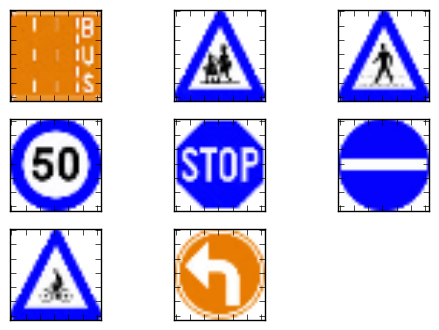

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

new_images_reshaped = []
new_images = []
for belgdata in os.listdir("./BelgData/"):
    image = cv2.imread("./BelgData/"+belgdata)
    #print(np.shape(image))
    if(image is not None):
        #image = cv2.resize(image,(32,32))
        image = cv2.resize(image,(32,32))
        new_images.append(image)
        #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
        image = image[:,:,0]#selecting only Y channel
        image_reshape = np.reshape(image, (32,32,1))
        
        new_images_reshaped.append(image_reshape)
#displaying images before converting
for i in range(8):
    axis = plt.subplot(3,3,i+1)
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    plt.imshow(new_images[i])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



- I have downloaded images from the Belgian data set and use that to predict the images. I have used the bus lane image from belgian data set and as expected, it is predicted wrong as Traffic Signals
- Remaining images - Children Crossing(28), Pedestrians(27), Speed Limit 50km/h(2), No Entry(17), Turn Left Ahead(34)
- Wrongly Predicted which I was expecting to predict right - Stop sign and Bicycle as Beware of ice/snow(30). This might be due to the data transformations I used. I have bumped up all the images to be 2500 in count. This might have caused to predict some images wrongly. Few images might have been overfit. Getting a better data set and also, training with more epochs might improve the accuracy for these images.
- Accuracy for the model is 5 out of 8 - 62.5% 

In [30]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


# saver = tf.train.Saver()
# #saver = tf.train.Saver()
# saver.restore(sess,'lenet')
# new_predictions = sess.run(soft_max, feed_dict={x: new_images})
# print(new_predictions)

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
# with tf.Session() as sess:
#     saver.restore(sess, save_path="lenet")
#     new_predictions = sess.run(soft_max, feed_dict={x: new_images})
#     print(new_predictions)


with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    #new_saver.restore(sess, 'lenet')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    #print(sess.run(soft_max, feed_dict={x: new_images}))
    #predictions = sess.run(tf.nn.top_k(soft_max, 5), feed_dict={x: new_images_reshaped})
    #print(np.shape(predictions))
    #print(predictions)
    predictions = sess.run(prediction,feed_dict={x: new_images_reshaped,keep_prob: 1.0} )
    print(predictions)
    print(sess.run(tf.nn.top_k(soft_max, 5), feed_dict={x: new_images_reshaped,keep_prob: 1.0}))
    print(sess.run(tf.nn.top_k(soft_max, 2), feed_dict={x: new_images_reshaped,keep_prob: 1.0}))
    

[26 28 27  2 30 17 30 34]
TopKV2(values=array([[  1.89481780e-01,   1.61488757e-01,   1.47497550e-01,
          1.03608549e-01,   8.44395161e-02],
       [  9.24445629e-01,   6.81541711e-02,   7.35359220e-03,
          4.59071816e-05,   7.66446249e-07],
       [  8.36725473e-01,   1.62793368e-01,   2.62974529e-04,
          1.30575238e-04,   4.46937956e-05],
       [  6.86099350e-01,   3.13881397e-01,   1.08157583e-05,
          2.82144811e-06,   2.37294034e-06],
       [  3.48410845e-01,   1.38742149e-01,   1.31976739e-01,
          1.07703865e-01,   9.79139432e-02],
       [  1.00000000e+00,   2.68270208e-14,   1.59972182e-22,
          1.23617861e-22,   1.33993468e-24],
       [  1.00000000e+00,   1.86522264e-08,   1.57285282e-10,
          3.12909789e-12,   7.78006132e-13],
       [  9.99960542e-01,   3.74835654e-05,   1.78408970e-06,
          2.24435084e-07,   1.53494977e-08]], dtype=float32), indices=array([[26, 24, 29, 25, 18],
       [28, 11, 30, 27, 23],
       [27, 11, 26, 4

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


- The above model is only 62.5% accurate on the new images tested
- The right prediction for stop sign and bicycle is in top-5. This might be due to the data transformations I used. I have bumped up all the images to be 2500 in count. This might have caused to predict some images wrongly.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.



Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The right prediction for stop sign and bicycle is in top-5. This might be due to the data transformations I used. I have bumped up all the images to be 2500 in count. This might have caused to predict some images wrongly.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.